In [1]:
import torch, platform
print('Torch:', torch.__version__)
print('CUDA available:', torch.cuda.is_available())
if torch.cuda.is_available():
    print('Device name:', torch.cuda.get_device_name(0))
    print('Compute capability:', torch.cuda.get_device_capability(0))
print('Python:', platform.python_version())
!nvidia-smi || true

Torch: 2.8.0+cu126
CUDA available: True
Device name: NVIDIA L4
Compute capability: (8, 9)
Python: 3.12.11
Tue Sep  9 10:18:24 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA L4                      Off |   00000000:00:03.0 Off |                    0 |
| N/A   44C    P8             13W /   72W |       3MiB /  23034MiB |      0%      Default |
|                                 

In [2]:
!pip -q install --upgrade pip
!pip -q install 'transformers>=4.44.0' accelerate sentencepiece timm torchvision pillow
!pip -q install flash-attn --no-build-isolation || echo 'flash-attn not installed (optional)'

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 71.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  DEPRECATION: Building 'flash-attn' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'flash-attn'. Discussion can be found at https://github.com/pypa/pip/issues/6334


In [3]:
from transformers import AutoModel, AutoTokenizer
import torch

MODEL_ID = 'openbmb/MiniCPM-V-4_5'
def pick_dtype():
    if torch.cuda.is_available():
        major, minor = torch.cuda.get_device_capability(0)
        if major >= 8:
            return torch.bfloat16
        else:
            return torch.float16
    return torch.float32

torch_dtype = pick_dtype()
attn_impl = 'sdpa'

model = AutoModel.from_pretrained(
    MODEL_ID,
    trust_remote_code=True,
    attn_implementation=attn_impl,
    torch_dtype=torch_dtype,
)
if torch.cuda.is_available():
    model = model.eval().cuda()
else:
    model = model.eval()

tokenizer = AutoTokenizer.from_pretrained(MODEL_ID, trust_remote_code=True)
print('Loaded:', MODEL_ID, '| dtype:', torch_dtype)


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json: 0.00B [00:00, ?B/s]

configuration_minicpm.py: 0.00B [00:00, ?B/s]

modeling_navit_siglip.py: 0.00B [00:00, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/openbmb/MiniCPM-V-4_5:
- modeling_navit_siglip.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
A new version of the following files was downloaded from https://huggingface.co/openbmb/MiniCPM-V-4_5:
- configuration_minicpm.py
- modeling_navit_siglip.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
`torch_dtype` is deprecated! Use `dtype` instead!


modeling_minicpmv.py: 0.00B [00:00, ?B/s]

resampler.py: 0.00B [00:00, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/openbmb/MiniCPM-V-4_5:
- resampler.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
A new version of the following files was downloaded from https://huggingface.co/openbmb/MiniCPM-V-4_5:
- modeling_minicpmv.py
- resampler.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


model.safetensors.index.json: 0.00B [00:00, ?B/s]

Fetching 4 files:   0%|          | 0/4 [00:00<?, ?it/s]

model-00003-of-00004.safetensors:   0%|          | 0.00/4.55G [00:00<?, ?B/s]

model-00002-of-00004.safetensors:   0%|          | 0.00/5.30G [00:00<?, ?B/s]

model-00004-of-00004.safetensors:   0%|          | 0.00/2.26G [00:00<?, ?B/s]

model-00001-of-00004.safetensors:   0%|          | 0.00/5.29G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/268 [00:00<?, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

tokenization_minicpmv_fast.py: 0.00B [00:00, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/openbmb/MiniCPM-V-4_5:
- tokenization_minicpmv_fast.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json:   0%|          | 0.00/11.4M [00:00<?, ?B/s]

added_tokens.json: 0.00B [00:00, ?B/s]

special_tokens_map.json: 0.00B [00:00, ?B/s]

Loaded: openbmb/MiniCPM-V-4_5 | dtype: torch.bfloat16


In [4]:
from PIL import Image

def minicpm_chat(image, instruction: str, stream: bool=False, enable_thinking: bool=False, **chat_kwargs) -> str:
    """Call MiniCPM-V-4.5 using its official chat API.
    - image: PIL.Image.Image
    - instruction: user instruction string
    - stream: if True, returns incremental tokens; otherwise returns final string.
    - enable_thinking: toggles the model's 'thinking mode' per model card.
    - chat_kwargs: forwarded to model.chat (e.g., max_slice_nums, use_image_id)
    """
    assert hasattr(model, 'chat'), 'This checkpoint must expose model.chat when trust_remote_code=True'
    assert isinstance(image, Image.Image), 'image must be a PIL.Image.Image'
    msgs = [
        {"role": "user", "content": [image, instruction]}
    ]
    out = model.chat(
        msgs=msgs,
        tokenizer=tokenizer,
        enable_thinking=enable_thinking,
        stream=stream,
        **chat_kwargs
    )
    if stream:
        text = ''
        for token in out:
            text += token
        return text
    return out

print('Helper ready: minicpm_chat(image, instruction, stream=False)')

Helper ready: minicpm_chat(image, instruction, stream=False)


Saving table5.png to table5.png


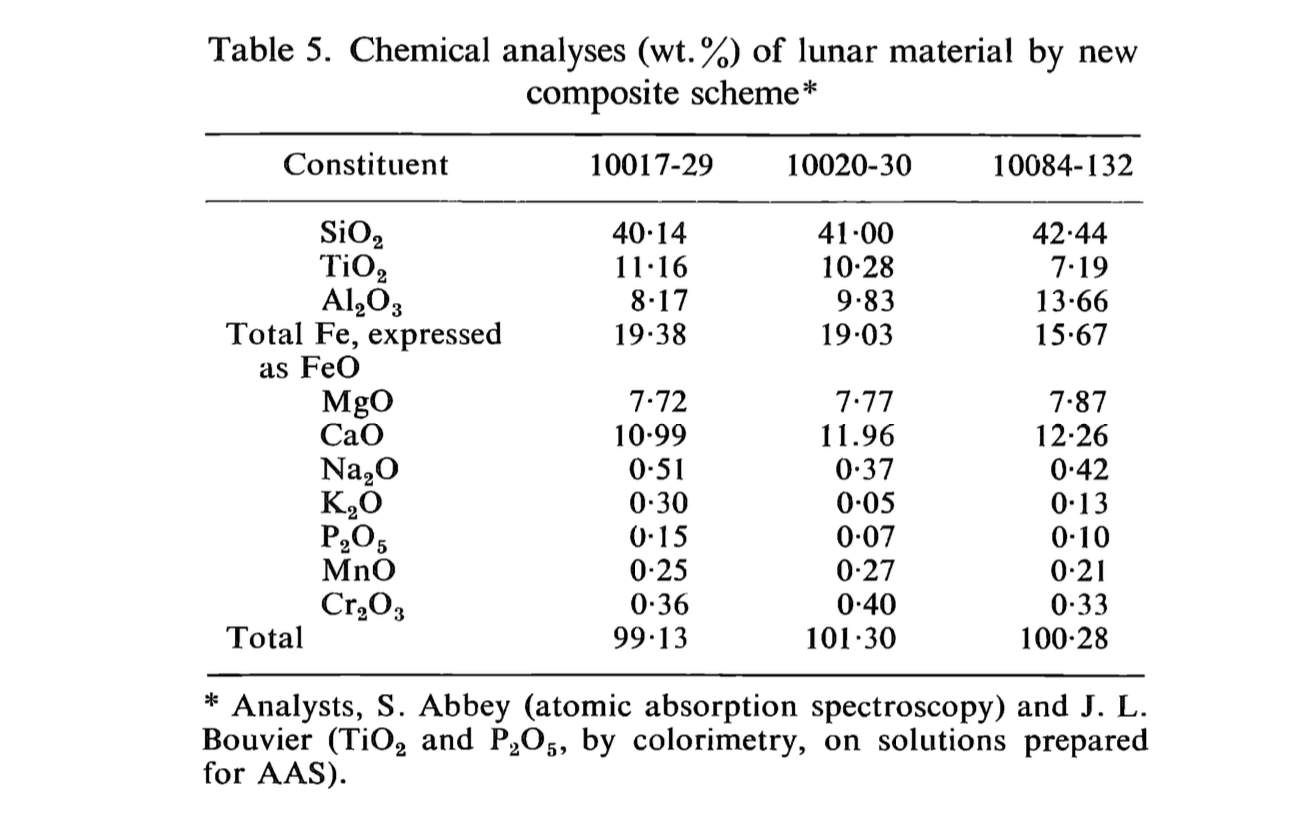

In [5]:
#@title Upload a table image
from google.colab import files
up = files.upload()
img_path = list(up.keys())[0]
img = Image.open(img_path).convert('RGB')
img

In [6]:
# Extract table → CSV
csv_prompt = (
    "You are given a document image that contains a table.\n"
    "Extract the table in CSV format with these rules:\n"
    "- Keep column order as in the image unless columns are provided.\n"
    "- Preserve chemical formulas (e.g., SiO2, TiO2, Al2O3).\n"
    "- Use '.' as decimal separator.\n"
    "- Output only the CSV text, no commentary."
)
csv_text = minicpm_chat(img, csv_prompt, stream=False)
print(csv_text)

preprocessor_config.json:   0%|          | 0.00/714 [00:00<?, ?B/s]

Fetching 1 files:   0%|          | 0/1 [00:00<?, ?it/s]

processing_minicpmv.py: 0.00B [00:00, ?B/s]

image_processing_minicpmv.py: 0.00B [00:00, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/openbmb/MiniCPM-V-4_5:
- image_processing_minicpmv.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
A new version of the following files was downloaded from https://huggingface.co/openbmb/MiniCPM-V-4_5:
- processing_minicpmv.py
- image_processing_minicpmv.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
/usr/local/lib/python3.12/dist-packages/transformers/models/auto/image_processing_auto.py:646: FutureWarning: The image_processor_class argument is deprecated and will be removed in v4.42. Please use `slow_image_processor_class`, or `fast_image_processor_class` instead
  warnings.warn(


Fetching 1 files:   0%|          | 0/1 [00:00<?, ?it/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


Constituent,10017-29,10020-30,10084-132
SiO2,40.14,41.00,42.44
TiO2,11.16,10.28,7.19
Al2O3,8.17,9.83,13.66
Total Fe, expressed as FeO,19.38,19.03,15.67
MgO,7.72,7.77,7.87
CaO,10.99,11.96,12.26
Na2O,0.51,0.37,0.42
K2O,0.30,0.05,0.13
P2O5,0.15,0.07,0.10
MnO,0.25,0.27,0.21
Cr2O3,0.36,0.40,0.33
Total,99.13,101.30,100.28
